<a href="https://colab.research.google.com/github/Wittypanda/AAI_MiniProject/blob/main/TAC_GAN_AAI_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members:


*   Aditya Joshi (24)
*   Janvi Chavan (06)

*   Tanvi Patil (45)





TAC-GAN Architecture
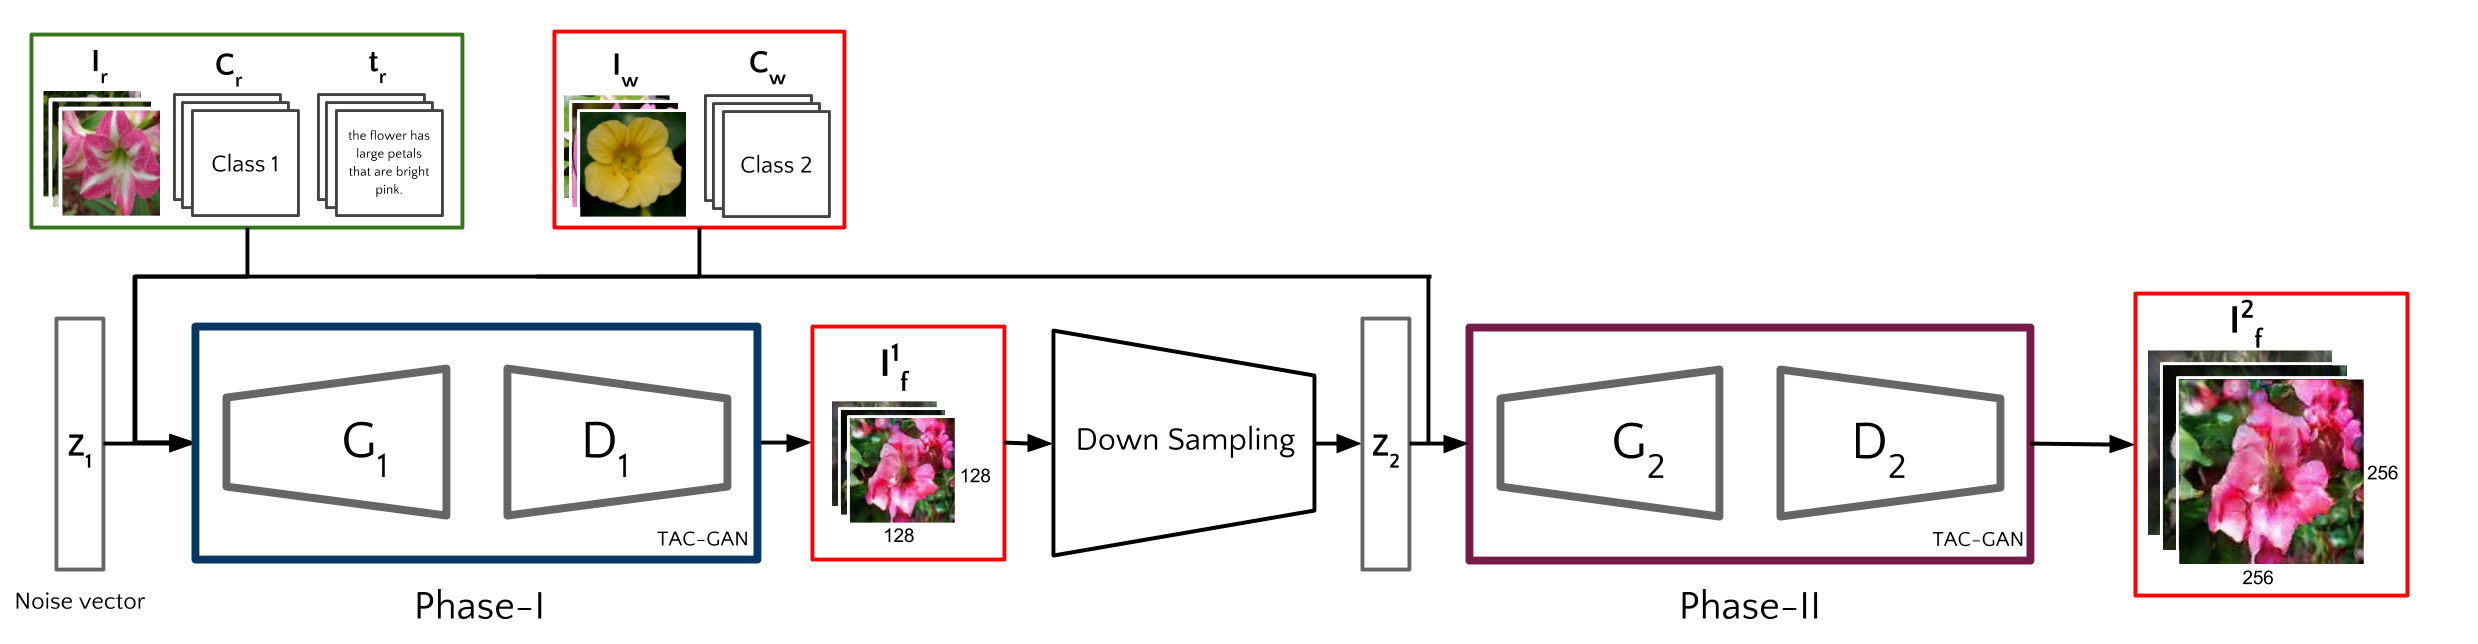

In [ ]:
!pip install opendatasets


Kindly generate you're own API key to download be able to downlaod the datasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/kmahesh541/flowershd5dataset")
od.download("https://www.kaggle.com/datasets/msripooja/flowershd5words")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshi18
Your Kaggle Key: ··········


100%|██████████| 3.47G/3.47G [00:40<00:00, 91.4MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshi18
Your Kaggle Key: ··········


100%|██████████| 28.8k/28.8k [00:00<00:00, 16.5MB/s]

In [ ]:
import os
print(os.listdir("../content"))
print(os.listdir("../content/flowershd5dataset/flowers-hd5/data/flowers/"))
print(os.listdir("../content/flowershd5words"))
hdf5_fpath = "../content/flowershd5dataset/flowers-hd5/data/flowers/flowers.hdf5"

['.config', 'flowershd5words', 'flowershd5dataset', 'sample_data']
['flowers.hdf5']
['flowers.hdf5.words']


In [ ]:
#All imports are here

import io
import h5py
import argparse
import torch
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn
from datetime import timedelta
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
from sklearn.neighbors import NearestNeighbors

print("All libraries imported!")

All libraries imported!


In [ ]:
#view contents in HDF5 files
f = h5py.File(hdf5_fpath)

#1. to know the categories in hdf5 file
print(list(f))
print("\nNo. of items in test = ",len(list(f['test'])))
print("\nNo. of items in train = ",len(list(f['train'])))
print("\nNo. of items in valid = ",len(list(f['valid'])))

#2. see what data is stored in each category
#print("\n\ntest = \n",list(f['test']))

#print("\n\ntrain = \n",list(f['train']))

#print("\n\nvalid = \n",list(f['valid']))

['test', 'train', 'valid']

No. of items in test =  5775

No. of items in train =  29390

No. of items in valid =  5780


creating fresh params for discriminator
creating fresh params for generator
***Calling Nearest Neighbour***
start loading data for NN test source_flowers_only_nn_data.pl


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


finish loading data for NN test
*** Inside train() func ***
*** Inside _train_gan() func ***
Epoch: 0, d_loss= 1.324314, g_loss= 41.122368, ccaD(X)= 0.829681, D(G(X))= 0.437781
Epoch: 0, d_loss= 1.932102, g_loss= 33.505310, ccaD(X)= 0.508741, D(G(X))= 0.494111
Epoch: 0, d_loss= 1.427721, g_loss= 30.372911, ccaD(X)= 0.424143, D(G(X))= 0.174729
Epoch: 0, d_loss= 1.114439, g_loss= 28.088264, ccaD(X)= 0.609944, D(G(X))= 0.209083
Epoch: 0, d_loss= 1.098342, g_loss= 27.079304, ccaD(X)= 0.774881, D(G(X))= 0.368002
Epoch: 0, d_loss= 0.828481, g_loss= 26.304111, ccaD(X)= 0.651623, D(G(X))= 0.180609
Epoch: 0, d_loss= 0.691897, g_loss= 27.763174, ccaD(X)= 0.632120, D(G(X))= 0.068297
Epoch: 0, d_loss= 0.849875, g_loss= 27.906391, ccaD(X)= 0.832748, D(G(X))= 0.283891
Epoch: 0, d_loss= 0.928349, g_loss= 27.127108, ccaD(X)= 0.703032, D(G(X))= 0.297971
Epoch: 0, d_loss= 1.191961, g_loss= 25.010361, ccaD(X)= 0.439009, D(G(X))= 0.140932
Epoch: 0, d_loss= 0.916618, g_loss= 25.436207, ccaD(X)= 0.625857, D

<ipython-input-8-2d07a6f52f46>:672: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  right_images_v = Variable(right_images.float(), volatile=True)
<ipython-input-8-2d07a6f52f46>:673: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  right_embed_v = Variable(right_embed.float(), volatile=True)
<ipython-input-8-2d07a6f52f46>:677: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  noise = Variable(torch.randn(right_images_v.size(0), self.noise_dim), volatile=True)


fake_source shape:  torch.Size([64, 3, 64, 64])
text description:  this flower has white petals as well as a white stamen.



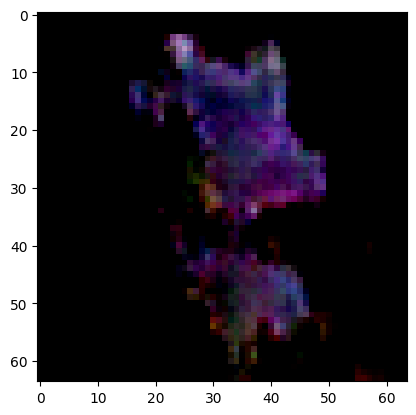

<ipython-input-8-2d07a6f52f46>:672: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  right_images_v = Variable(right_images.float(), volatile=True)
<ipython-input-8-2d07a6f52f46>:673: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  right_embed_v = Variable(right_embed.float(), volatile=True)
<ipython-input-8-2d07a6f52f46>:677: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  noise = Variable(torch.randn(right_images_v.size(0), self.noise_dim), volatile=True)


fake_source shape:  torch.Size([64, 3, 64, 64])
text description:  this flower has white petals as well as a white stamen.



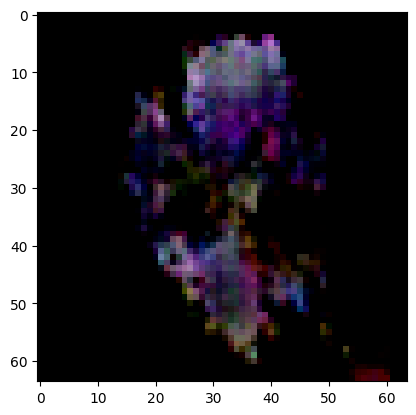


combined text:  0 original sentence:  this flower has white petals as well as a white stamen.
 nn_sentences:  ['this flower has purple-pink petals with yellow inner areas of the petal and dark red stripes on some of the petals.\n', 'these flowers are yellow, with wide, curled petals, and a brighter yellow in the center.\n']

combined text:  1 original sentence:  this flower has a lot of white round ended petals that surround a grouping of yellow stamen, including antennas.
 nn_sentences:  ['the flower has thin petals that are yellow in color with a center made of yellow anthers.\n', 'this flower has pink pedals with large yellowish stamen.\n']

combined text:  2 original sentence:  this flower is red and white in color, with only one large petal.
 nn_sentences:  ['this flower had many thin, yellow petals and a cluster of rounded, yellow structures at the center.\n', 'this flower has pink pedals with large yellowish stamen.\n']

combined text:  3 original sentence:  this flower has sev

In [ ]:
################ nn.py (NearestNeighbour) ###################

class NearestNeighbor:
    def __init__(self, dataset, source, cuda, ngf):
        self.dataset = dataset
        data = None
        representation = None
        labels = []
        embeddings = []
        path = ''
        data_path = path + 'source_{}_nn_data.pl'.format(source)
        labels_path = path + 'source_{}_nn_labels.pl'.format(source)
        nbrs_path = path + 'source_{}_nn.pl'.format(source)
        embeddings_path = path + 'source_{}_nn_embeddings.pl'.format(source)
        self.model = gan_factory.generator_factory('vae', ngf, False)
        if cuda:
            self.model = self.model.cuda()
        #self.model.load_state_dict(torch.load('./checkpoints/flowers_autoencoder/gen.pth'))

        if os.path.exists(data_path):
            print('start loading data for NN test {}'.format(data_path))
            data = pickle.load(open(data_path, 'rb'))
            labels = pickle.load(open(labels_path, 'rb'))
            nbrs = pickle.load(open(nbrs_path, 'rb'))
            embeddings = pickle.load(open(embeddings_path, 'rb'))
        else:
            print('start creating data for NN test {}'.format(data_path))
            for i, sample in enumerate(dataset):
                #print("**** iter i = ",i)
                if data is None:
                    data = sample['right_images'].numpy()
                    data_var = Variable(sample['right_images'].float(), volatile=True)
                    if cuda:
                        data_var = data_var.cuda()
                    representation = self.model.encoder_only(data_var).data.cpu().numpy()
                    labels = sample['txt']
                    embeddings = sample['right_embed']
                else:
                    data = np.append(data, sample['right_images'].numpy(), axis=0)
                    data_var = Variable(sample['right_images'].float(), volatile=True)
                    if cuda:
                        data_var = data_var.cuda()
                    representation = np.append(representation, self.model.encoder_only(data_var).data.cpu().numpy(),
                                               axis=0)
                    labels += sample['txt']
                    embeddings = np.append(embeddings, sample['right_embed'].numpy(), axis=0)
            nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(representation.reshape(-1, 228))
            pickle.dump(data, open(data_path, 'wb'))
            pickle.dump(labels, open(labels_path, 'wb'))
            pickle.dump(nbrs, open(nbrs_path, 'wb'))
            pickle.dump(embeddings, open(embeddings_path, 'wb'))
        print('finish loading data for NN test')
        self.data = data
        self.labels = labels
        self.nbrs = nbrs
        self.embeddings = embeddings

    def get_text(self, samples, limit=-1):
        text_results, _, _ = self.get_text_and_images_and_embedding(samples, limit)
        return text_results

    def get_text_and_images(self, samples, limit):
        text_results, image_results, _ = self.get_text_and_images_and_embedding(samples, limit)
        return text_results, image_results

    def get_text_and_images_and_embedding(self, samples, limit=-1):
        samples_embedding = self.model.encoder_only(samples).data.cpu().numpy().reshape(-1, 228)
        if limit != -1:
            samples_embedding = samples_embedding[:limit]
        distances, indices = self.nbrs.kneighbors(samples_embedding)
        text_results = [self.labels[index] for index in indices[:, 0]]
        image_results = [self.data[index] for index in indices[:, 0]]
        embedding_results = [self.embeddings[index] for index in indices[:, 0]]
        return text_results, image_results, embedding_results

################ nn.py (NearestNeighbour) ends here ###################

################ txt2image_dataset.py ###################

class Text2ImageDataset(Dataset):

    def __init__(self, datasetFile, transform=None, split=0):
        self.datasetFile = datasetFile
        self.transform = transform
        self.dataset = None
        self.dataset_keys = None
        self.split = 'train' if split == 0 else 'valid' if split == 1 else 'test'
        self.h5py2int = lambda x: int(np.array(x))

    def __len__(self):
        f = h5py.File(self.datasetFile, 'r')
        self.dataset_keys = [str(k) for k in f[self.split].keys()]
        length = len(f[self.split])
        f.close()

        return length

    def __getitem__(self, idx):
        if self.dataset is None:
            self.dataset = h5py.File(self.datasetFile, mode='r')
            self.dataset_keys = [str(k) for k in self.dataset[self.split].keys()]

        example_name = self.dataset_keys[idx]
        example = self.dataset[self.split][example_name]

        # pdb.set_trace()

        right_image = bytes(np.array(example['img']))
        right_embed = np.array(example['embeddings'], dtype=float)
        wrong_image = bytes(np.array(self.find_wrong_image(example['class'])))
        inter_embed = np.array(self.find_inter_embed())

        right_image = Image.open(io.BytesIO(right_image)).resize((64, 64))
        wrong_image = Image.open(io.BytesIO(wrong_image)).resize((64, 64))

        right_image = self.validate_image(right_image)
        wrong_image = self.validate_image(wrong_image)

        txt = np.array(example['txt']).astype(str)
        class_ = np.array(example['class']).astype(str)

        sample = {
                'right_images': torch.FloatTensor(right_image),
                'right_embed': torch.FloatTensor(right_embed),
                'wrong_images': torch.FloatTensor(wrong_image),
                'inter_embed': torch.FloatTensor(inter_embed),
                'txt': str(txt),
                'class': str(class_)
                 }

        sample['right_images'] = sample['right_images'].sub_(127.5).div_(127.5)
        sample['wrong_images'] =sample['wrong_images'].sub_(127.5).div_(127.5)

        return sample

    def find_wrong_image(self, category):
        idx = np.random.randint(len(self.dataset_keys))
        example_name = self.dataset_keys[idx]
        example = self.dataset[self.split][example_name]
        _category = example['class']

        if _category != category:
            return example['img']

        return self.find_wrong_image(category)

    def find_inter_embed(self):
        idx = np.random.randint(len(self.dataset_keys))
        example_name = self.dataset_keys[idx]
        example = self.dataset[self.split][example_name]
        return example['embeddings']


    def validate_image(self, img):
        img = np.array(img, dtype=float)
        if len(img.shape) < 3:
            rgb = np.empty((64, 64, 3), dtype=np.float32)
            rgb[:, :, 0] = img
            rgb[:, :, 1] = img
            rgb[:, :, 2] = img
            img = rgb

        return img.transpose(2, 0, 1)

################ txt2image_dataset.py ends here ###################

################ utils.py ###################

class Concat_embed(nn.Module):
    def __init__(self, embed_dim, projected_embed_dim):
        super(Concat_embed, self).__init__()
        self.projection = nn.Sequential(nn.Linear(in_features=embed_dim, out_features=projected_embed_dim),
                                        nn.BatchNorm1d(num_features=projected_embed_dim),
                                        nn.LeakyReLU(negative_slope=0.2, inplace=True))

    def forward(self, inp, embed):
        projected_embed = self.projection(embed)
        replicated_embed = projected_embed.repeat(4, 4, 1, 1).permute(2, 3, 0, 1)
        hidden_concat = torch.cat([inp, replicated_embed], 1)

        return hidden_concat

class Utils(object):
    def __init__(self, cuda):
        self.is_cuda = cuda

    def cuda(self, variable):
        return variable.cuda() if self.is_cuda else variable

    @staticmethod
    def smooth_label(tensor, offset):
        return tensor + offset

    @staticmethod
    def save_checkpoint(netD, netG, dir_path, epoch):
        path = dir_path #os.path.join(dir_path, subdir_path)
        if not os.path.exists(path):
            os.makedirs(path)

        torch.save(netD.state_dict(), '{0}/disc_{1}.pth'.format(path, epoch))
        torch.save(netG.state_dict(), '{0}/gen_{1}.pth'.format(path, epoch))

    @staticmethod
    def weights_init(m):
        classname = m.__class__.__name__
        if classname.find('Conv') != -1:
            m.weight.data.normal_(0.0, 0.02)
        elif classname.find('BatchNorm') != -1:
            m.weight.data.normal_(1.0, 0.02)
            m.bias.data.fill_(0)

################ utils.py ends here ###################

################ vae.py ###################

class vae_encoder_generator(nn.Module):
    def __init__(self, ngf):
        super(vae_encoder_generator, self).__init__()
        self.vae_encoder = vae_encoder(ngf)
        self.vae_generator = vae_generator(ngf)

    def forward(self, inp):
        x = self.vae_encoder(inp)
        x = self.vae_generator(x)
        return x

    def generator_only(self, latent):
        return self.vae_generator(latent)

    def encoder_only(self, inp):
        return self.vae_encoder(inp.cuda())


class vae_generator(nn.Module):
    def __init__(self, ngf):
        super(vae_generator, self).__init__()
        self.image_size = 64
        self.num_channels = 3
        self.noise_dim = 100
        self.embed_dim = 1024
        self.projected_embed_dim = 128
        self.latent_dim = self.noise_dim + self.projected_embed_dim
        self.ngf = ngf

        # self.projection = nn.Sequential(nn.Linear(in_features=self.embed_dim, out_features=self.projected_embed_dim),
        #     nn.BatchNorm1d(num_features=self.projected_embed_dim), nn.LeakyReLU(negative_slope=0.2, inplace=True))

        # based on: https://github.com/pytorch/examples/blob/master/dcgan/main.py
        self.netG = nn.Sequential(
            nn.ConvTranspose2d(self.latent_dim, self.ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.ngf * 8),
            nn.ReLU(True), # state size. (ngf*8) x 4 x 4

            nn.ConvTranspose2d(self.ngf * 8, self.ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf * 4),
            nn.ReLU(True), # state size. (ngf*4) x 8 x 8

            nn.ConvTranspose2d(self.ngf * 4, self.ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf * 2),
            nn.ReLU(True), # state size. (ngf*2) x 16 x 16

            nn.ConvTranspose2d(self.ngf * 2, self.ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf),
            nn.ReLU(True),

            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(self.ngf, self.num_channels, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (num_channels) x 64 x 64
        )

    def forward(self, latent_vector):
        # projected_embed = self.projection(embed_vector).unsqueeze(2).unsqueeze(3)
        # latent_vector = torch.cat([projected_embed, z], 1)
        latent_vector = latent_vector.view(-1, self.latent_dim, 1, 1)
        #print("**** latent_vector is cuda = ",latent_vector.cpu().is_cuda)
        output = self.netG(latent_vector.cpu())

        return output


class vae_encoder(nn.Module):
    def __init__(self, ngf):
        super(vae_encoder, self).__init__()
        self.image_size = 64
        self.num_channels = 3
        self.embed_dim = 1024
        self.noise_dim = 100
        self.projected_embed_dim = 128
        self.latent_dim = self.noise_dim + self.projected_embed_dim
        self.ngf = ngf

        self.projection = nn.Sequential(nn.Linear(in_features=self.embed_dim, out_features=self.projected_embed_dim),
            nn.BatchNorm1d(num_features=self.projected_embed_dim), nn.LeakyReLU(negative_slope=0.2, inplace=True))

        # based on: https://github.com/pytorch/examples/blob/master/dcgan/main.py
        self.netE = nn.Sequential(
            # state size. (num_channels) x 64 x 64
            nn.Conv2d(self.num_channels, self.ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf),
            nn.ReLU(True),

            # state size. (ngf) x 32 x 32
            nn.Conv2d(self.ngf, self.ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf * 2),
            nn.ReLU(True),

            # state size. (ngf*2) x 16 x 16
            nn.Conv2d(self.ngf * 2, self.ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.ngf * 4),
            nn.ReLU(True),

            # state size. (ngf*4) x 8 x 8not
        output = self.netE(images)
        #print(output.is_cuda)
        return output


class vae_discriminator(nn.Module):
    def __init__(self, remove_noise):
        super(discriminator, self).__init__()
        self.image_size = 64
        self.num_channels = 128
        self.embed_dim = 1024
        if remove_noise:
            self.projected_embed_dim = 228
            self.noise_dim = 0
        else:
            self.projected_embed_dim = 128
            self.noise_dim = 100
        self.B_dim = 128
        self.C_dim = 16
        self.minibatch_discriminator = minibatch_discriminator(self.num_channels, self.B_dim, self.C_dim)
        #
        self.netD_1 = nn.Sequential(
            nn.Linear(self.projected_embed_dim + self.noise_dim, 228),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(228, 128),
            nn.LeakyReLU(0.2, inplace=True),
        )

        self.netD_2 = nn.Sequential(
            nn.Linear(128 + self.B_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, inp):
        x = inp.view(-1, self.projected_embed_dim + self.noise_dim)
        x = self.netD_1(x)
        x = self.minibatch_discriminator(x)
        x = self.netD_2(x)

        return x.view(-1)

################ vae.py ends here ###################

################ gan_cls.py ###################

class generator(nn.Module):
    def __init__(self, remove_noise, variational):
        super(generator, self).__init__()
        self.image_size = 64
        self.num_channels = 3
        self.embed_dim = 1024
        self.remove_noise = remove_noise
        if remove_noise:
            self.noise_dim = 0
            self.projected_embed_dim = 228
        else:
            self.noise_dim = 100
            self.projected_embed_dim = 128
        self.latent_dim = self.noise_dim + self.projected_embed_dim
        self.ngf = 64
        self.variational = variational
        self.mu = None
        self.sd = None

        self.projection = nn.Sequential(nn.Linear(in_features=self.embed_dim, out_features=self.projected_embed_dim),
            nn.BatchNorm1d(num_features=self.projected_embed_dim), nn.LeakyReLU(negative_slope=0.2, inplace=True))

        if variational:
            self.en_mu = nn.Conv2d(self.projected_embed_dim, self.projected_embed_dim, 1, 1, 0)
            self.en_sigma = nn.Conv2d(self.projected_embed_dim, self.projected_embed_dim, 1, 1, 0)
            self.softplus = nn.Softplus()
            self.en_mu.weight.data.normal_(0, 0.002)
            self.en_mu.bias.data.normal_(0, 0.002)
            self.en_sigma.weight.data.normal_(0, 0.002)
            self.en_sigma.bias.data.normal_(0, 0.002)

        # based on: https://github.com/pytorch/examples/blob/master/dcgan/main.py
        self.netG = nn.Sequential(nn.ConvTranspose2d(self.latent_dim, self.ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.ngf * 8), nn.ReLU(True), # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(self.ngf * 8, self.ngf * 4, 4, 2, 1, bias=False), nn.BatchNorm2d(self.ngf * 4),
            nn.ReLU(True), # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(self.ngf * 4, self.ngf * 2, 4, 2, 1, bias=False), nn.BatchNorm2d(self.ngf * 2),
            nn.ReLU(True), # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(self.ngf * 2, self.ngf, 4, 2, 1, bias=False), nn.BatchNorm2d(self.ngf), nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(self.ngf, self.num_channels, 4, 2, 1, bias=False), nn.Tanh()
            # state size. (num_channels) x 64 x 64
        )

    def forward(self, embed_vector, z, noise):
        return self.netG(self.encoder_only(embed_vector, z, noise))

    def encoder_only(self, embed_vector, z, noise):
        projected_embed = self.projection(embed_vector).unsqueeze(2).unsqueeze(3)
        if self.variational:
            self.mu = self.en_mu(projected_embed)
            self.sd = self.softplus(self.en_sigma(projected_embed))
            projected_embed = self.mu + self.sd.mul(noise)
        if self.remove_noise:
            latent_vector = projected_embed
        else:
            latent_vector = torch.cat([projected_embed, z], 1)
        return latent_vector

    def generator_only(self, latent_vector):
        return self.netG(latent_vector)


class discriminator(nn.Module):
    def __init__(self, remove_noise):
        super(discriminator, self).__init__()
        self.image_size = 64
        self.num_channels = 3
        self.embed_dim = 1024
        if remove_noise:
            self.projected_embed_dim = 228
        else:
            self.projected_embed_dim = 128
        self.ndf = 64
        self.B_dim = 128
        self.C_dim = 16

        self.netD_1 = nn.Sequential(# input is (nc) x 64 x 64
            nn.Conv2d(self.num_channels, self.ndf, 4, 2, 1, bias=False), nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(self.ndf, self.ndf * 2, 4, 2, 1, bias=False), nn.BatchNorm2d(self.ndf * 2),
            nn.LeakyReLU(0.2, inplace=True), # state size. (ndf*2) x 16 x 16
            nn.Conv2d(self.ndf * 2, self.ndf * 4, 4, 2, 1, bias=False), nn.BatchNorm2d(self.ndf * 4),
            nn.LeakyReLU(0.2, inplace=True), # state size. (ndf*4) x 8 x 8
            nn.Conv2d(self.ndf * 4, self.ndf * 8, 4, 2, 1, bias=False), nn.BatchNorm2d(self.ndf * 8),
            nn.LeakyReLU(0.2, inplace=True), )

        self.projector = Concat_embed(self.embed_dim, self.projected_embed_dim)

        self.netD_2 = nn.Sequential(# state size. (ndf*8) x 4 x 4
            nn.Conv2d(self.ndf * 8 + self.projected_embed_dim, 1, 4, 1, 0, bias=False), nn.Sigmoid())

    def forward(self, inp, embed):
        x_intermediate = self.netD_1(inp)
        x = self.projector(x_intermediate, embed)
        x = self.netD_2(x)

        return x.view(-1, 1).squeeze(1), x_intermediate

################ gan_cls.py ends here ###################

################ gan_factory.py ###################

class gan_factory(object):
    @staticmethod
    def generator_factory(type, ngf, remove_noise, variational=False):
        if type == 'gan':
            return generator(remove_noise, variational)
        elif type == 'vae':
            return vae_encoder_generator(ngf)

    @staticmethod
    def discriminator_factory(type, remove_noise):
        if type == 'gan':
            return discriminator(remove_noise)
        elif type == 'vae':
            return vae_discriminator(remove_noise)

################ gan_factory.py ends here ###################

################ trainer.py ###################

class Trainer(object):
    def __init__(self, type, dataset, split, lr, diter, vis_screen, save_path, l1_coef, l2_coef, pre_trained_gen,
                 pre_trained_disc, batch_size, num_workers, epochs, args, params_search=False):
        self.config = args
        self.cuda = torch.cuda.is_available()

        self.generator = gan_factory.generator_factory(type, args.ngf, args.remove_noise_2, args.variational)
        self.discriminator = gan_factory.discriminator_factory(type, args.remove_noise_2)

        self.target_generator = gan_factory.generator_factory(args.target_type, args.ngf, args.remove_noise_2)

        if self.cuda:
            self.generator = self.generator.cuda()
            self.discriminator = self.discriminator.cuda()

        if pre_trained_disc:
            print('loading {} from {}'.format('discriminator', pre_trained_disc))
            self.discriminator.load_state_dict(torch.load(pre_trained_disc))
        else:
            if not params_search:
                print('creating fresh params for {}'.format('discriminator'))
            self.discriminator.apply(Utils.weights_init)

        if pre_trained_gen:
            print('loading {} from {}'.format('generator', pre_trained_gen))
            self.generator.load_state_dict(torch.load(pre_trained_gen))
        else:
            if not params_search:
                print('creating fresh params for {}'.format('generator'))
            self.generator.apply(Utils.weights_init)

        if dataset == 'flowers_only':
            self.dataset = Text2ImageDataset(self.config.flowers_dataset_path, split=0)
            self.target_dataset = Text2ImageDataset(self.config.flowers_dataset_path, split=2)
        else:
            print('Dataset not supported, please select either birds, flowers or flowers_only.')
            exit()

        self.noise_dim = 100
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.lr = lr
        self.beta1 = 0.5x
        self.num_epochs = epochs
        self.DITER = diter

        self.l1_coef = l1_coef
        self.l2_coef = l2_coef

        self.data_loader = DataLoader(self.dataset, batch_size=self.batch_size, shuffle=True,
                                      num_workers=self.num_workers)
        self.target_data_loader = DataLoader(self.target_dataset, batch_size=self.batch_size, shuffle=True,
                                             num_workers=self.num_workers)

        self.optimD = torch.optim.Adam(self.discriminator.parameters(), lr=self.lr, betas=(self.beta1, 0.999))
        self.optimG = torch.optim.Adam(self.generator.parameters(), lr=self.lr, betas=(self.beta1, 0.999))

        self.save_path = save_path
        self.type = type
        # self.h_el = args.h_el
        self.args = args
        if not params_search:
            self.checkpoints_path = 'tmp/'
            if not os.path.exists(self.checkpoints_path):
                os.makedirs(self.checkpoints_path)
            print("***Calling Nearest Neighbour***")
            self.nn = NearestNeighbor(self.target_data_loader, dataset, self.cuda, args.ngf)
        self.params_search = params_search

    def train(self, cls=False):
        print("*** Inside train() func ***")
        if self.type == 'gan':
            self._train_gan(cls)

    def _train_gan(self, cls):
        print("*** Inside _train_gan() func ***")
        criterion = nn.BCELoss()
        l2_loss = nn.MSELoss()
        l1_loss = nn.L1Loss()
        iteration = 0

        for epoch in range(self.num_epochs):
            for sample in self.data_loader:
                iteration += 1
                right_images = sample['right_images']
                right_embed = sample['right_embed']
                wrong_images = sample['wrong_images']

                right_images = Variable(right_images.float()).cuda()
                right_embed = Variable(right_embed.float()).cuda()
                wrong_images = Variable(wrong_images.float()).cuda()

                real_labels = torch.ones(right_images.size(0))
                fake_labels = torch.zeros(right_images.size(0))

                # ======== One sided label smoothing ==========
                # Helps preventing the discriminator from overpowering the
                # generator adding penalty when the discriminator is too confident
                # =============================================
                smoothed_real_labels = torch.FloatTensor(Utils.smooth_label(real_labels.numpy(), -0.1))

                real_labels = Variable(real_labels).cuda()
                smoothed_real_labels = Variable(smoothed_real_labels).cuda()
                fake_labels = Variable(fake_labels).cuda()

                # Train the discriminator
                self.discriminator.zero_grad()
                outputs, activation_real = self.discriminator(right_images, right_embed)
                real_loss = criterion(outputs, smoothed_real_labels)
                real_score = outputs

                if cls:
                    outputs, _ = self.discriminator(wrong_images, right_embed)
                    wrong_loss = criterion(outputs, fake_labels)
                    wrong_score = outputs

                if self.args.remove_noise:
                    noise = Variable(torch.zeros(right_images.size(0), self.noise_dim)).cuda()
                else:
                    noise = Variable(torch.randn(right_images.size(0), self.noise_dim)).cuda()
                noise = noise.view(noise.size(0), 100, 1, 1)
                fake_images = self.generator(right_embed, noise, noise)
                outputs, _ = self.discriminator(fake_images, right_embed)
                fake_loss = criterion(outputs, fake_labels)
                fake_score = outputs

                d_loss = real_loss + fake_loss

                if cls:
                    d_loss = d_loss + wrong_loss

                d_loss.backward()
                self.optimD.step()

                # Train the generator
                self.generator.zero_grad()
                if self.args.remove_noise:
                    noise = Variable(torch.zeros(right_images.size(0), self.noise_dim)).cuda()
                else:
                    noise = Variable(torch.randn(right_images.size(0), self.noise_dim)).cuda()
                noise = noise.view(noise.size(0), 100, 1, 1)
                fake_images = self.generator(right_embed, noise, noise)
                outputs, activation_fake = self.discriminator(fake_images, right_embed)
                _, activation_real = self.discriminator(right_images, right_embed)

                activation_fake = torch.mean(activation_fake, 0)
                activation_real = torch.mean(activation_real, 0)

                # ======= Generator Loss function============
                # This is a customized loss function, the first term is the regular cross entropy loss
                # The second term is feature matching loss, this measure the distance between the real and generated
                # images statistics by comparing intermediate layers activations
                # The third term is L1 distance between the generated and real images, this is helpful for the conditional case
                # because it links the embedding feature vector directly to certain pixel values.
                # ===========================================
                g_loss = criterion(outputs, real_labels) +\
                         self.l2_coef * l2_loss(activation_fake, activation_real.detach()) +\
                         self.l1_coef * l1_loss(fake_images, right_images)

                g_loss.backward()
                self.optimG.step()

                if iteration % 10 == 0:
                    print("Epoch: %d, d_loss= %f, g_loss= %f, ccaD(X)= %f, D(G(X))= %f" % (epoch, d_loss.data.cpu().mean(), g_loss.data.cpu().mean(), real_score.data.cpu().mean(), fake_score.data.cpu().mean()))

            if (epoch) % 10 == 0:
                Utils.save_checkpoint(self.discriminator, self.generator, self.save_path, epoch)

    def test(self):
        self.generator.eval()
        self.target_generator.eval()
        number_of_images = 2
        sample = next(iter(self.data_loader))
        all_nn_texts = []
        all_nn_images = []
        all_fake_sources = []
        all_transfers = []
        text = sample['txt']
        right_images = sample['right_images']
        right_embed = sample['right_embed']
        for i in range(number_of_images):
            right_images_v = Variable(right_images.float(), volatile=True)
            right_embed_v = Variable(right_embed.float(), volatile=True)
            if self.args.remove_noise:
                noise = Variable(torch.zeros(right_images_v.size(0), self.noise_dim), volatile=True)
            else:
                noise = Variable(torch.randn(right_images_v.size(0), self.noise_dim), volatile=True)
            if self.cuda:
                right_embed_v = right_embed_v.cuda()
                noise = noise.cuda()

            noise = noise.view(noise.size(0), self.noise_dim, 1, 1)
            #print("right_embed_v type = ",type(right_embed_v),"noise = ",type(noise))
            fake_target = self.target_generator.generator_only(self.generator.encoder_only(right_embed_v, noise, noise))
            all_transfers.append(fake_target)
            fake_source = self.generator(right_embed_v, noise,noise)
            all_fake_sources.append(fake_source)

            fake_source = fake_source.cuda()
            print("fake_source shape: ",fake_source.detach().shape)
            print("text description: ",text[0])
            plt.imshow(fake_source[0].cpu().detach().permute(1, 2, 0))
            plt.show()

            nn_text, nn_images = self.nn.get_text_and_images(fake_target, -1)
            all_nn_texts.append(nn_text)
            all_nn_images.append(nn_images)

        for i, sentence in enumerate(text):
            nn_sentences = [sents[i] for sents in all_nn_texts]
            print("\ncombined text: ",i,"original sentence: ",sentence,"nn_sentences: ",nn_sentences)

        for i, image in enumerate(right_images):
            nn_images = [imgs[i] for imgs in all_nn_images]
            fake_source_images = [imgs[i].data.cpu().numpy() for imgs in all_fake_sources]
            transfers_images = [imgs[i].data.cpu().numpy() for imgs in all_transfers]
            image_tile = np.tile(image, (len(nn_images), 1, 1, 1))
            #self.logger.draw_test(image_tile, fake_source_images, transfers_images, nn_images, 'image {}'.format(i))
        print("*** end of testing ***")

################ trainer.py ends here ###################

################ runtime.py ###################
class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)

parser = argparse.ArgumentParser()
params = dict()

params['type']='gan' #change this if you want to train any other gan
params['target_type']='vae'
params['lr']=0.0002
params['l1_coef']=50
params['l2_coef']=100
params['diter']=5
params['cls']=False
params['save_path']='tmp/'
params['inference']=False
params['target_train']=False
params['dataset']='flowers_only'
params['split']=0
params['batch_size']=64
params['num_workers']=20
params['ngf']=64
params['epochs']=5
params['remove_noise']=False
params['remove_noise_2']=False
params['variational']=False
params['vis_screen']=False
params['pre_trained_disc']=False
params['pre_trained_gen']=False
params['flowers_dataset_path']="/content/flowershd5dataset/flowers-hd5/data/flowers/flowers.hdf5"

args = Struct(**params) #Convert nested Python dict to object

trainer = Trainer(type=args.type, dataset=args.dataset, split=args.split, lr=args.lr, diter=args.diter,
                  vis_screen=args.vis_screen, save_path=args.save_path, l1_coef=args.l1_coef,
                  l2_coef=args.l2_coef,pre_trained_disc=args.pre_trained_disc,
                  pre_trained_gen=args.pre_trained_gen, batch_size=args.batch_size,
                  num_workers=args.num_workers, epochs=args.epochs, args=args)

start_time = time.time()

if not args.inference:
    if args.target_train:
        trainer.target_train(args.cls)
    else:
        trainer.train(args.cls)
print("*** Calling test() ***")
trainer.test()

elapsed = str(timedelta(seconds=int(time.time() - start_time)))
print('Running {} took {}'.format("GAN-CLS", elapsed))

################ runtime.py ends here ###################